<h1><center>Medical Appointment No Shows</center></h1>

# Introduction
> A person makes a doctor appointment, receives all the instructions and then doesn't show up. Who to blame?.Here is my favourite place to answer these kind of questions .[More info](https://www.kaggle.com/joniarroba/noshowappointments)

## Preliminary Wrangling

In [1]:
# Important packages
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sb
import pandas as pd
import numpy as np

%matplotlib inline

# Suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Loading the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Before asking any questions let's first know more about our data** 

In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Although this data appears to be clean and have no missing info but i sill can't be sure if all its data makes sense or not.To solve this issue let's look at its **statistical characteristics**

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


It seems that the dataset isn't very clean after all **(the minimum value of Age is -1,how is that possible?!)** i know that there is a possibility that -1 means that the patient is still a fetus.But i can't be sure of it as no such thing is mentioned in the description.So i'll just take advantage of the big amount of the data and drop them.

In [6]:
df = df[df['Age'] > 0]

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.shape

(106987, 14)

>I know that i lost alot of data but the data is large enough for completing my exploration 

Secondly,Let's see if 'Neighbourhood' variable is important or not **(by counting the unique values in it)**

In [9]:
df['Neighbourhood'].nunique()

81

>It's a large number for a categrical variable but let's consider it ,for now, an important feature because **81 unique values from 106987 in total** may lead us to something.

Last but not least is **the PeriodLength between ScheduledDay and AppointmentDay**,Is it an important feature?.To answer this question i need to make sure first that all ScheduledDay and AppointmentDay are not in the same day (as appeared to me when i looked at the first 5 rows) 

In [10]:
#This function calculates the difference,in days,between any two dates d1,d2
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return (d2 - d1).days

In [11]:
df['PeriodLength'] = df.apply(lambda x:days_between(x['ScheduledDay'][:10],x['AppointmentDay'][:10]),axis=1)

I want to make sure that all the values in 'PeriodLength' is **greater than or equal to 0**

In [12]:
df[df['PeriodLength'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,PeriodLength
27033,7.839273e+12,5679978,M,2016-05-10T10:51:53Z,2016-05-09T00:00:00Z,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7.896294e+12,5715660,F,2016-05-18T14:50:41Z,2016-05-17T00:00:00Z,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,2.425226e+13,5664962,F,2016-05-05T13:43:58Z,2016-05-04T00:00:00Z,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,9.982316e+14,5686628,F,2016-05-11T13:49:20Z,2016-05-05T00:00:00Z,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3.787482e+12,5655637,M,2016-05-04T06:50:57Z,2016-05-03T00:00:00Z,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


>How come the ScheduledDay is after the AppointmentDay,it's definitely a typo.Thank god they are only 5 observations,So i'll just drop them

In [13]:
df = df[df['PeriodLength'] >= 0]

>Now i can say that **the PeriodLength,in days,** between ScheduledDay and AppointmentDay may be an important feature 

In [14]:
df.shape

(106982, 15)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106982 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106982 non-null  float64
 1   AppointmentID   106982 non-null  int64  
 2   Gender          106982 non-null  object 
 3   ScheduledDay    106982 non-null  object 
 4   AppointmentDay  106982 non-null  object 
 5   Age             106982 non-null  int64  
 6   Neighbourhood   106982 non-null  object 
 7   Scholarship     106982 non-null  int64  
 8   Hipertension    106982 non-null  int64  
 9   Diabetes        106982 non-null  int64  
 10  Alcoholism      106982 non-null  int64  
 11  Handcap         106982 non-null  int64  
 12  SMS_received    106982 non-null  int64  
 13  No-show         106982 non-null  object 
 14  PeriodLength    106982 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 13.1+ MB


In [16]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,PeriodLength
count,1.069820e+05,1.069820e+05,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000
mean,1.472785e+14,5.675434e+06,38.316315,0.101036,0.203782,0.074246,0.031407,0.022957,0.323279,10.167290
std,2.558181e+14,7.133426e+04,22.466023,0.301377,0.402811,0.262172,0.174416,0.164064,0.467730,15.263631
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173345e+12,5.640488e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.433627e+13,5.725639e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


### The structure of the dataset:

- 106982 rows (observations)
- 15 columns (variables)

### The main feature of interest in the dataset:
- No-show (Categorical-Nominal)

### The features in the dataset that may support the investigation into the feature of interest:
- Gender (Categorical-Nominal)
- PeriodLength (Numerical-Discrete)
- Age (Numerical-Discrete)
- Neighbourhood (Categorical-Nominal)
- Scholarship (Categorical-Nominal)
- Hipertension (Categorical-Nominal)
- Diabetes (Categorical-Nominal)
- Alcoholism (Categorical-Nominal)
- Handcap (Numerical-Discrete)
- SMS_received (Numerical-Discrete) (as stated in the description of the dataset)

## Univariate Exploration

I noticed something while exploring the data so i'll begin with it **so that my treatment affect the next visualizations too**

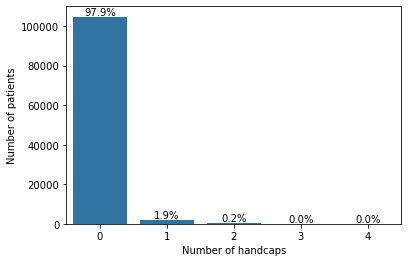

In [17]:
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='Handcap', color=base_color)

# add annotations
n_points = df.shape[0]
pres_counts = df['Handcap'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = pres_counts[int(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # add the annotation 
    plt.text(loc, count+1000, pct_string, ha = 'center', color = 'black')

plt.xlabel('Number of handcaps')
plt.ylabel('Number of patients');

Because the patients that have more than 2 handcaps are **very small** in number their percentage is approximately 0%.Let's see their actual number

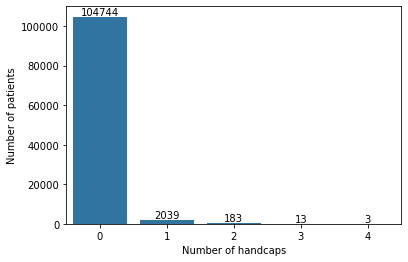

In [18]:
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='Handcap', color=base_color)

# add annotations
n_points = df.shape[0]
pres_counts = df['Handcap'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = pres_counts[int(label.get_text())]
    pct_string = str(count)

    # add the annotation 
    plt.text(loc, count+1000, pct_string, ha = 'center', color = 'black')

plt.xlabel('Number of handcaps')
plt.ylabel('Number of patients');

Before deciding what to do with them.I wanna first know what **percentage of them missed the appointment.**

In [19]:
df_temp = df[df['Handcap'] > 2]
df_temp[df_temp['No-show'] == 'Yes'].shape[0]/df_temp.shape[0]

0.25

>Very very low number.which makes me believe that a patient who has more than 2 handcaps won't necessarily miss the appointment.Accordingly i will drop them off the dataset

In [20]:
df = df[df['Handcap'] <= 2]

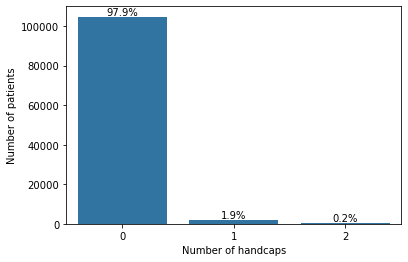

In [21]:
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='Handcap', color=base_color)

# add annotations
n_points = df.shape[0]
pres_counts = df['Handcap'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = pres_counts[int(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count+1000, pct_string, ha = 'center', color = 'black')

plt.xlabel('Number of handcaps')
plt.ylabel('Number of patients');

>Although i think that the number of handcaps isn't gonna be a good feature because of the vey small number of patients that has handcaps.But i still need to test that in Bivariate and Multivariate Exploration stages just to make sure.

Let's then look at our feature of interest 'No-show' 

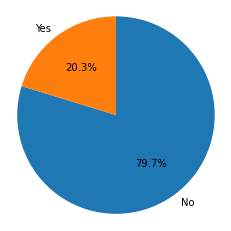

In [22]:
sorted_counts = df['No-show'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,counterclock = False,autopct='%1.1f%%');
plt.axis('square');

>It looks like that the majority of patients didn't miss their appointments 

Secondly,let's look at Gender

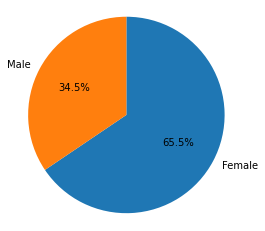

In [23]:
sorted_counts = df['Gender'].value_counts()
plt.pie(sorted_counts, labels = ['Female','Male'], startangle = 90,counterclock = False,autopct='%1.1f%%');
plt.axis('square');

>Looks like most of the patients are females

Age ...

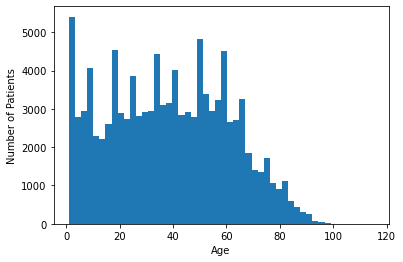

In [24]:
plt.hist(data=df, x='Age', bins=50)
plt.xlabel('Age')
plt.ylabel('Number of Patients');

> I think this distribution tells me that most patients are below 60 years old and after that the distribution is skewed to the right.And that is reasonable,i think,because people who are older than that **are mostly gonna die so their percentage of total patients should be small**.Also i can see that this distribution is unimodal with only one peak between 0-3 years old.

Let's also look at the neighbourhood 

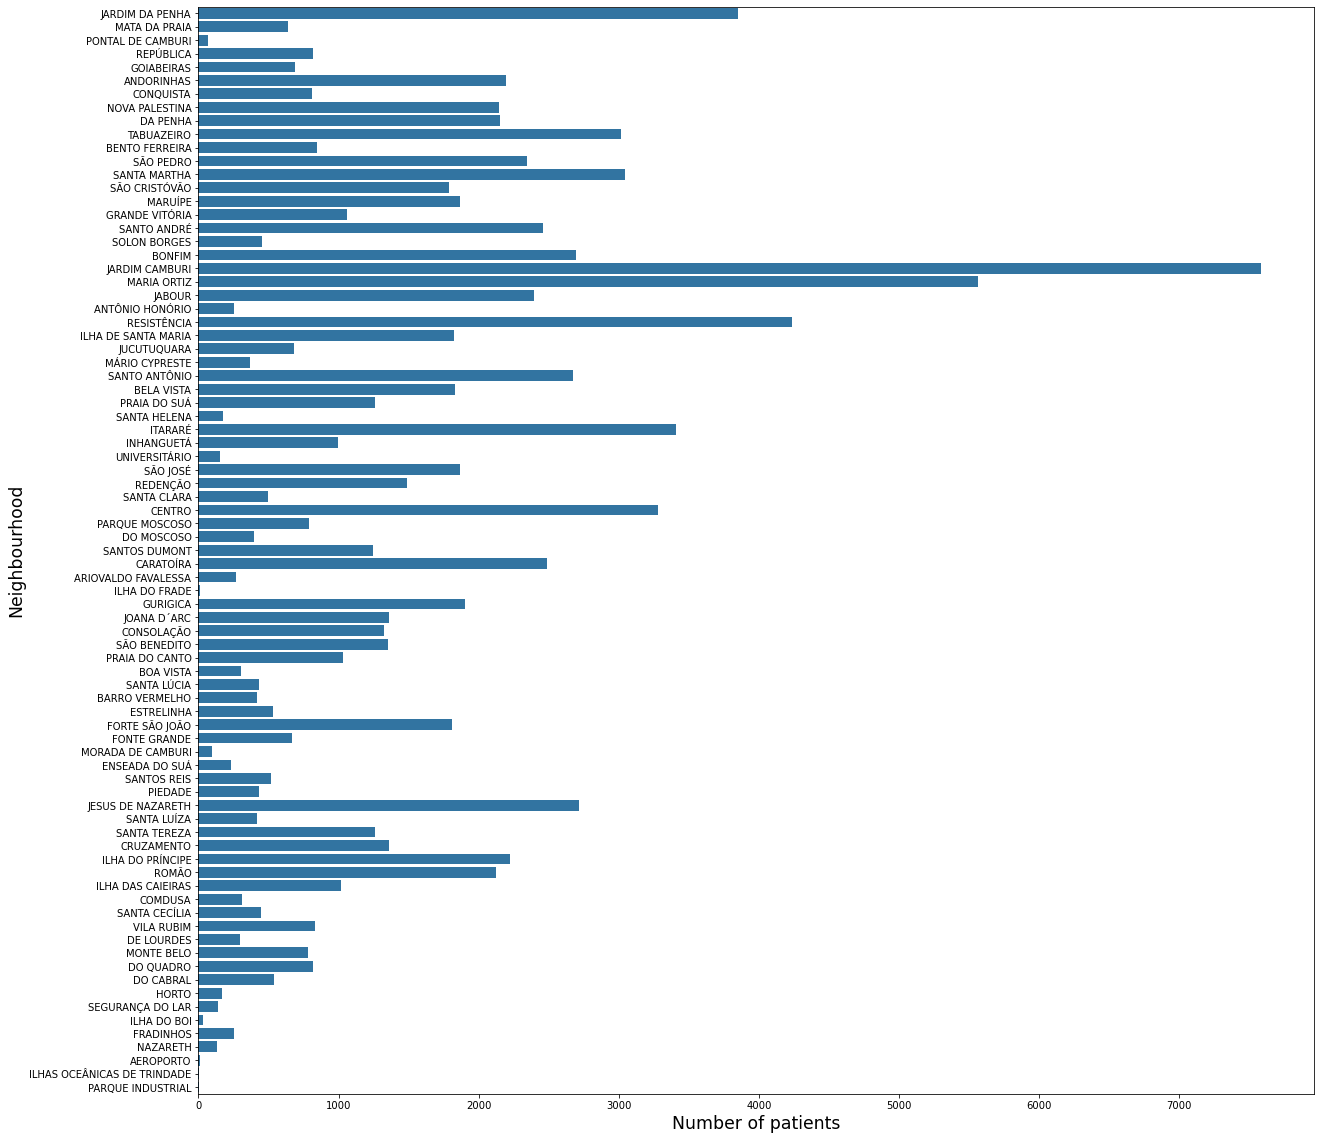

In [25]:
plt.figure(figsize = [20,20])
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='Neighbourhood', color=base_color);
plt.xlabel('Number of patients',fontsize='xx-large')
plt.ylabel('Neighbourhood',fontsize='xx-large');

>It looks like that there are neighbourhoods that patients prefer to go to than others.

Let's know more about the other variables

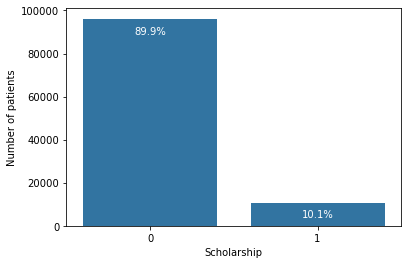

In [26]:
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='Scholarship', color=base_color)

# add annotations
n_points = df.shape[0]
pres_counts = df['Scholarship'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = pres_counts[int(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-7000, pct_string, ha = 'center', color = 'w')

plt.ylabel('Number of patients');

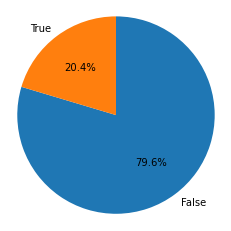

In [27]:
sorted_counts = df['Hipertension'].value_counts()
plt.pie(sorted_counts, labels = [False,True], startangle = 90,counterclock = False,autopct='%1.1f%%');
plt.axis('square');

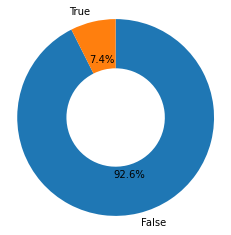

In [28]:
sorted_counts = df['Diabetes'].value_counts()
plt.pie(sorted_counts, labels = [False,True], startangle = 90,counterclock = False,autopct='%1.1f%%',wedgeprops = {'width' : 0.5});
plt.axis('square');

**Alcoholism**

In [29]:
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

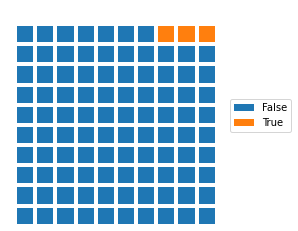

In [30]:
waffle_counts = percentage_blocks(df, 'Alcoholism')

prev_count = 0
# for each category,
for p in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[p])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[p]

# aesthetic wrangling
plt.legend([False,True], bbox_to_anchor = (1, 0.5), loc = 6);
plt.axis('off');
plt.axis('square');

**SMS_received**

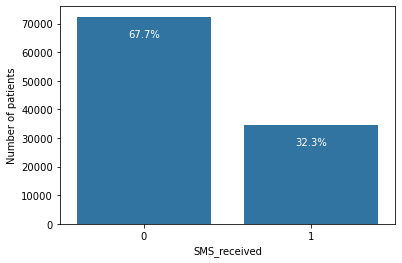

In [31]:
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='SMS_received', color=base_color)

# add annotations
n_points = df.shape[0]
pres_counts = df['SMS_received'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = pres_counts[int(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-7000, pct_string, ha = 'center', color = 'w')

plt.ylabel('Number of patients');

# Discussion of the distribution(s). 
### Were there any unusual points?
> Yes,there were in "Handcap" variable and i explained above my point of view for how i treated them

### Did i need to perform any transformations?
> No,i didn't.Although the number of patients is very high but i thought it'd be better if i  leave it as linear scale as it is.

### Were there any unusual distributions?
> No,i don't think so

### Did i perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did i do this?
> Yes,as i mentioned above i dropped all that observations that has age less than or equal to 0 , has more than 2 handcaps,or their ScheduledDay is after the AppointmentDay.I did so because some of them doesn't make sense and others are too small to be considered.

## Bivariate Exploration

Are males more reckless than females or the othe way around?,let's see...

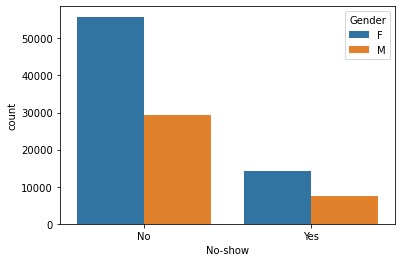

In [32]:
sb.countplot(data=df, x='No-show', hue='Gender');

> We know from the univariate phase that female is more than males,so i can't just say that a female is more likely to miss an appointment than a male. I need to consider the total number of females and males in this dataset

To do that let's plot the proportion of the ones who missed and didn't miss the appointment of each gender

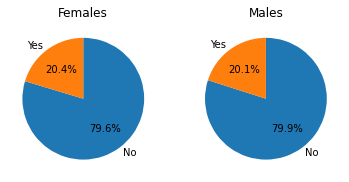

In [33]:
females = df[df['Gender'] == 'F']
males   = df[df['Gender'] == 'M']

plt.subplot(121)
sorted_counts = females['No-show'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,counterclock = False,autopct='%1.1f%%')
plt.title('Females');

plt.subplot(122)
sorted_counts = males['No-show'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,counterclock = False,autopct='%1.1f%%')
plt.title('Males');

> Sadly there's no big difference so Gender is not a good feature 

Is the long period between the ScheduledDay and AppointmentDay can affect anything?

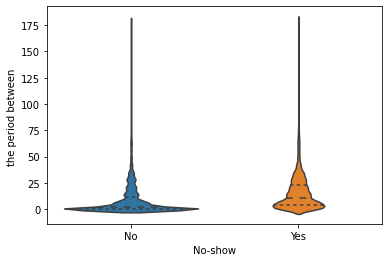

In [34]:
sb.violinplot(data=df, x='No-show', y='PeriodLength', inner='quartile');
plt.ylabel('the period between ');

>It looks like that **the longer the period of time between the ScheduledDay and AppointmentDay,the more likely that a patient gonna miss the appointment.**

Is Age a good feature...Let's see.

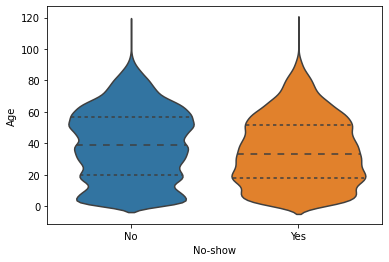

In [35]:
sb.violinplot(data=df, x='No-show', y='Age', inner='quartile')
plt.ylabel('Age');

> I can see here that the median of 'Yes' people is less than the median of the 'No' ones,also the 'Yes' people is more likely to be adults or teenagers(10-30) but on the other hand 'NO' people is more likely to be old(50-70) or very young (0-10)

Can Neighbourhood be a good feature ?

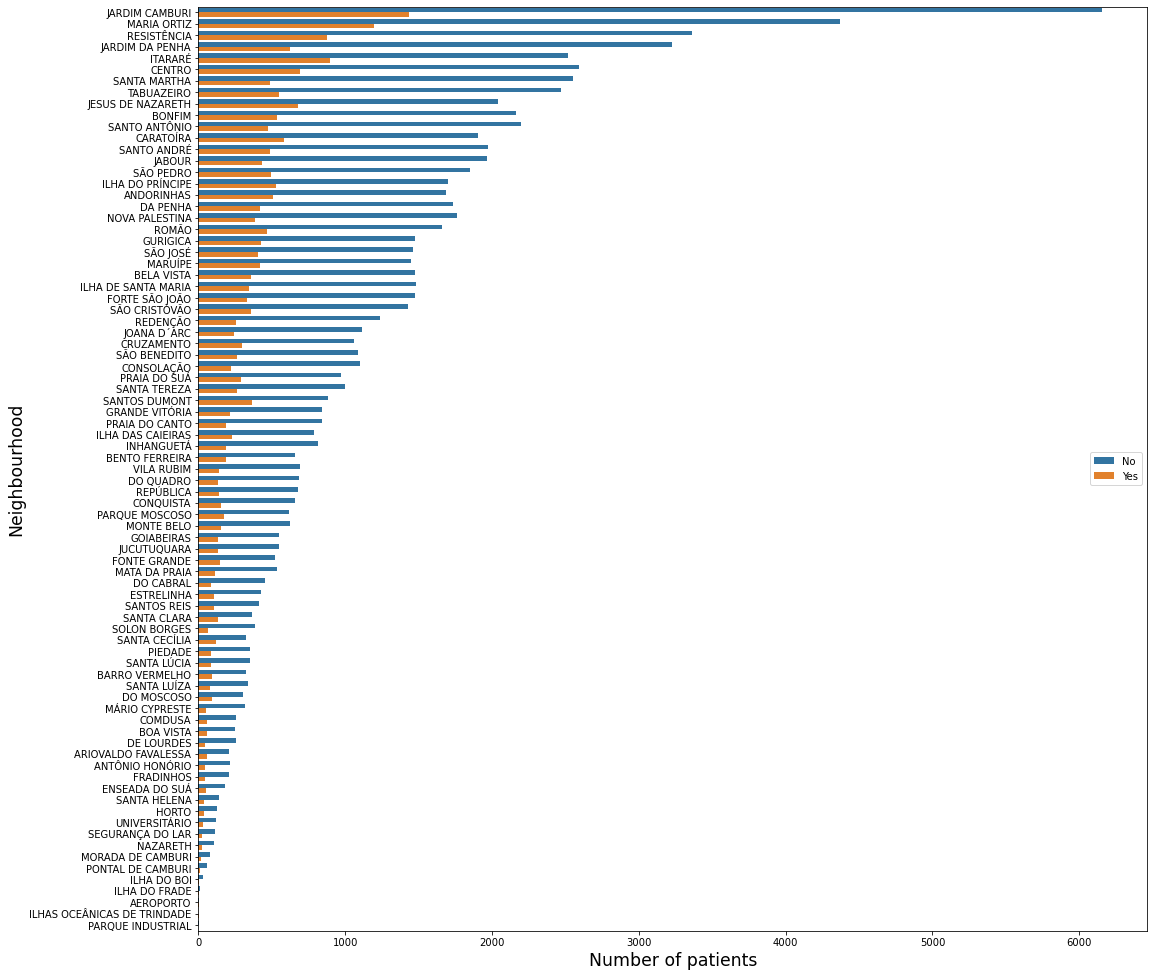

In [36]:
plt.figure(figsize = [17,17])
base_color = sb.color_palette()[0]
order = df['Neighbourhood'].value_counts().index
sb.countplot(data=df, y='Neighbourhood', hue='No-show', order = order)
plt.legend()
plt.xlabel('Number of patients',fontsize='xx-large')
plt.ylabel('Neighbourhood',fontsize='xx-large');

> It's weird,the neighbourhood that has the highest number of 'Yes' patients also has the highest number of 'No' patients,It's not alone the other 'Yes's and 'No's are very close to each other for every neighbourhood.So i think the reason why there're differneces between 'Yes's and 'No's is because of the differences in population not because patients prefer one and hate the other.Sadly the population of each neighbourhood is not given so i can say that 'Neighbourhood' is not useful right now. 

is being enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) can encourage the a patient not to miss the appointment ?

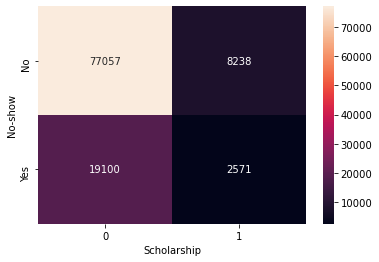

In [37]:
counts = df.groupby(['No-show','Scholarship']).size()
counts = counts.reset_index().rename(columns={0:'count'})
counts = counts.pivot(index='No-show',columns='Scholarship',values='count') 
sb.heatmap(counts, annot=True, fmt='d');

> Also here i can't decide like Gender Case 

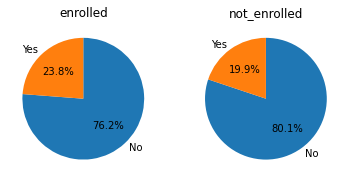

In [38]:
enrolled = df[df['Scholarship'] == 1]
not_enrolled   = df[df['Scholarship'] == 0]

plt.subplot(121)
sorted_counts = enrolled['No-show'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,counterclock = False,autopct='%1.1f%%')
plt.title('enrolled');

plt.subplot(122)
sorted_counts = not_enrolled['No-show'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,counterclock = False,autopct='%1.1f%%')
plt.title('not_enrolled');

>It's strange but it seems to me that the patients that aren't enrolled in the program are likely to attend the appointment

Is there a specific disease that urge the patient not to miss the appointment?.Let's see...

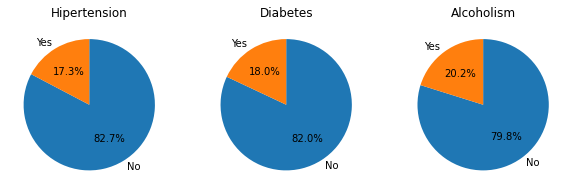

In [39]:
df_temp = df[['Hipertension', 'Diabetes', 'Alcoholism', 'No-show']]
df_temp = df_temp.groupby('No-show').sum()

figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,4))
for i,col in enumerate(df_temp):
    axes[i].pie(df_temp[col].values, labels = df_temp[col].index, startangle = 90,counterclock = False,autopct='%1.1f%%')
    axes[i].set_title(col);

>It looks like that the patients who suffer from alcoholism are more likely to miss the appointment

what about Handcaps ?

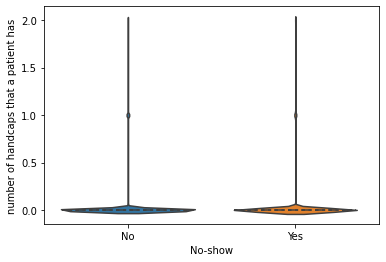

In [40]:
sb.violinplot(data=df, x='No-show', y='Handcap', inner='quartile');
plt.ylabel('number of handcaps that a patient has');

>As i expected the Number of handcaps that a patient has isn't a good feature 

If the a patient received one or more messages, does that affect his intention of attendance?

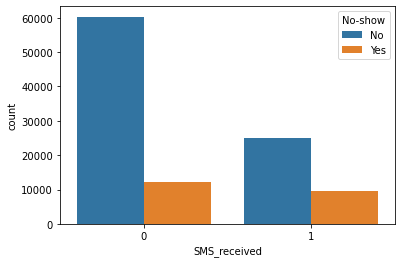

In [41]:
#as there are only one message or zero messages let's just use countplot
sb.countplot(data=df, x='SMS_received', hue='No-show');

> All i can say that receiving a message doesn't encourage a patient to attend the appointment.

Before Wraping up this stage,let's dig deeper to see if there are some relations between each feature with others(other than the feature of interest).

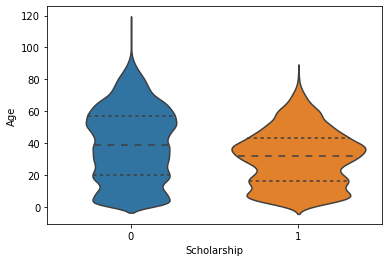

In [42]:
sb.violinplot(data=df, x='Scholarship', y='Age', inner='quartile')
plt.ylabel('Age');

>It seems to me that the scholarship is common between the patients who are (25-50) years old.

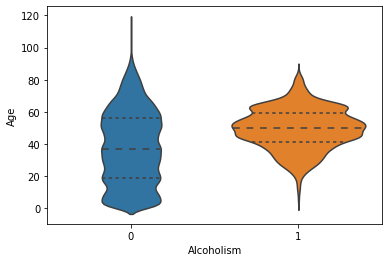

In [43]:
sb.violinplot(data=df, x='Alcoholism', y='Age', inner='quartile')
plt.ylabel('Age');

> Wow,really not as i expected.This result tells me that patients who suffer from Alcoholism is more likely to be old.But come to think of it,I think that makes more sense because addict people will not realize what catastrophe they put themselves in until they become older and wiser.Also,to be more realistic,most addicts don't suffer from the side effects of addiction untill their body become weak and they get older.

### Some of the relationships observed in this part of the investigation. 

- I illustrated above how the period between ScheduledDay and AppointmentDay can affect the patient's intention of attending the appointment.
- Also i noticed that Age can play some role here too.
- we can't ignore the fact that patients who suffer from Alcoholism are likely to attend the appointment. 
- Finally being enrolled in Brasilian welfare program or receiving a message from the doctor doesn't encourage the patients to attend the appointment.

### Interesting relationships between the other features (not the main feature(s) of interest)?

- As appeared to me in the above exploration, it seems that Age and Scholarship are related in some way.
- Also we can't ignore the fact that most of Alcoholism patients are old.

## Multivariate Exploration

Does being **enrolled** in the program make a patient with **a specific disease** urged to attend?

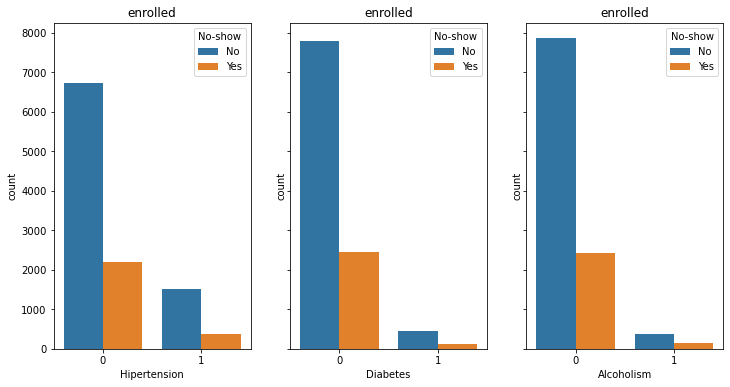

In [44]:
figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6), sharey=True)

sb.countplot(data=enrolled,x='Hipertension',hue='No-show',ax=axes[0])
axes[0].set_title('enrolled');

sb.countplot(data=enrolled,x='Diabetes',hue='No-show',ax=axes[1])
axes[1].set_title('enrolled');

sb.countplot(data=enrolled,x='Alcoholism',hue='No-show',ax=axes[2])
axes[2].set_title('enrolled');

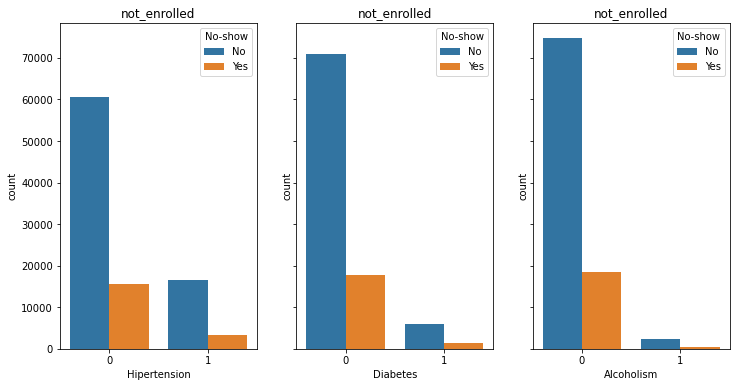

In [45]:
figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6), sharey=True)

sb.countplot(data=not_enrolled,x='Hipertension',hue='No-show',ax=axes[0])
axes[0].set_title('not_enrolled');

sb.countplot(data=not_enrolled,x='Diabetes',hue='No-show',ax=axes[1])
axes[1].set_title('not_enrolled');

sb.countplot(data=not_enrolled,x='Alcoholism',hue='No-show',ax=axes[2])
axes[2].set_title('not_enrolled');

>As we see above being enrolled doesn't encourage patients to attend regardless of their disease

Let's now see if the period between ScheduledDay and AppointmentDay with Age can make a good indicator for whether a patient will miss the appointment or not.

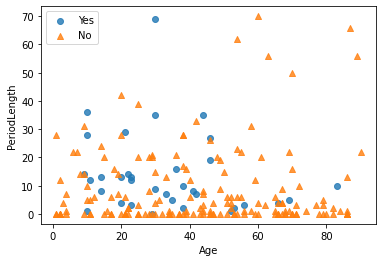

In [46]:
#Because of large amount of data let's just take a subset 
#I set the random_state to get the same results 
df_sub = df.sample(200, replace=False, random_state=42)
ttype_markers = [['Yes','o'],['No','^']]

for ttype,marker in ttype_markers:
    plot_data = df_sub.loc[df_sub['No-show'] == ttype]
    sb.regplot(data=plot_data,x='Age',y='PeriodLength',fit_reg=False,marker=marker);

plt.legend(['Yes','No']);

_Despite the noise,we can say long periods has two different reactions according to the age of the patient:_
- if the patient was below 50, he is more likely to miss the appointment.
- But if he was above 50, he is more likely to attend the appointment.

Let's try "Age" with "Scholarship" and see if they together have something to do with "No-show".

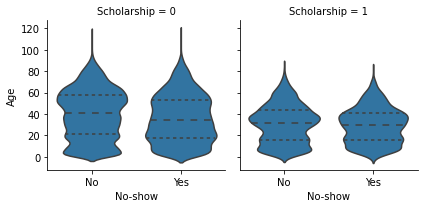

In [47]:
g = sb.FacetGrid(data=df, col='Scholarship')
g.map(sb.violinplot,'No-show','Age',inner='quartile');

> As we can see,there is no a specific relationship between "Age" and "Scholarship that can affect "No-show".

What about "Age" and "Gender"?

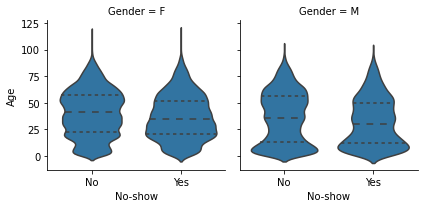

In [48]:
g = sb.FacetGrid(data=df, col='Gender')
g.map(sb.violinplot,'No-show','Age',inner='quartile');

> There's nothing special here i think dead end.

"PeriodLength" and "Gender"...?

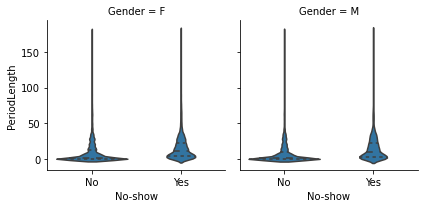

In [49]:
g = sb.FacetGrid(data=df, col='Gender')
g.map(sb.violinplot,'No-show','PeriodLength',inner='quartile');

> Also nothing special.

Does having a specfic disease make a patient urged not to miss the appointment ?

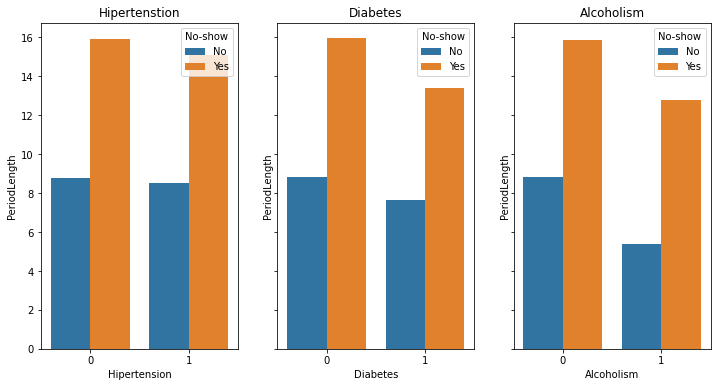

In [50]:
figure, axes = plt.subplots(nrows=1, ncols=3,figsize=(12,6), sharey=True)

sb.barplot(data=df, x='Hipertension', y='PeriodLength', hue='No-show', ci=None, ax=axes[0])
axes[0].set_title('Hipertenstion')

sb.barplot(data=df, x='Diabetes', y='PeriodLength', hue='No-show', ci=None, ax=axes[1])
axes[1].set_title('Diabetes')

sb.barplot(data=df, x='Alcoholism', y='PeriodLength', hue='No-show', ci=None, ax=axes[2])
axes[2].set_title('Alcoholism');

> That also confirms that the longer the period the more likely to miss the appointment regardless of the disease.

### The relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Of course,from the previous stage i think that the PeriodLength is a good feature and a perfect indicator whether the patient gonna miss the appointment or not.Also the Age of the patient is a good feature along with the PeriodLength.

### Were there any interesting or surprising interactions between features?

> In this dataset the number of the patients that missed the appointment are very small compared to the number of the ones that didn't miss it and that affects the results above.Although i believe that in real world these observations can affect each other in some way,But through this dataset it was hard for me to find a relationship between 3 or more variables at the same time (other than Age ,Period Length ,and No-show) 